# Week 9

Q4- want to put a green 2x2 square at the bottom right corner of some image

In [1]:
import numpy as np
import matplotlib.pyplot as plt

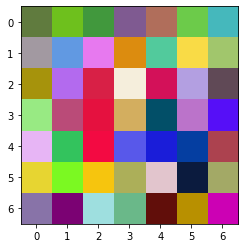

In [3]:
myimage=np.random.rand(7,7,3)
plt.imshow(myimage)
plt.show()

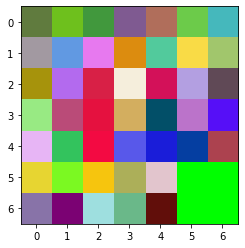

In [10]:
myim=myimage.copy()
myim[-2:,-2:,1]=1 # green
#myim[-2:,-2:,[0,2]]=0 # red and blue 
myim[-2:,-2:,0]=0 # red
myim[-2:,-2:,2]=0 # blue
plt.imshow(myim)
plt.show()

Q5 - generate a random 2d array 40x22, display it using viridis colormap

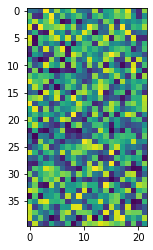

In [14]:
pippo=np.random.rand(40,22)
plt.imshow(pippo,cmap = 'viridis')
plt.show()

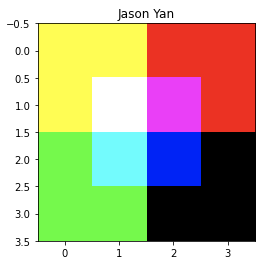

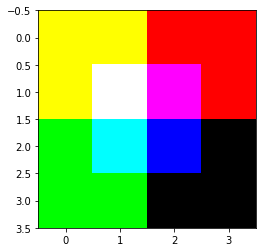

In [20]:
pippo=np.zeros((4,4,3))
pippo[0:2,:,0]=1 # red
pippo[:,0:2,1]=1 # green
pippo[1:3,1:3,2]=1 # blue
plt.imshow(pippo)
plt.show()

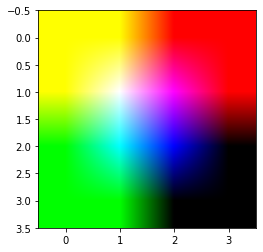

In [22]:
plt.imshow(pippo,interpolation='bilinear')
plt.show()

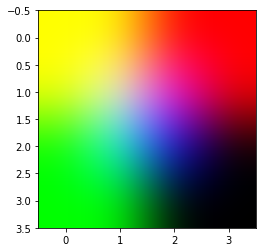

In [23]:
plt.imshow(pippo,interpolation='bicubic')
plt.show()

**Ex.** given the colors `purple=[0.7,0.3,0.5]`, `green=[0,1,0.2]`, `yellow=[0.9,0.9,0]` create a $10x13$ image with

* 4 purple vertical stripes
* 5 green vertical stripes
* 4 yellow vertical stripes

**Post the image in the channel stripes**

Use dictionaries to store the colors: 
* not ordered
* use a `key:value` system

In [25]:
cdict={ 'P':[0.7,0.3,0.5], 'G':[0,1,0.2], 'Y':[0.9,0.9,0] }

In [26]:
cdict

{'P': [0.7, 0.3, 0.5], 'G': [0, 1, 0.2], 'Y': [0.9, 0.9, 0]}

In [44]:
for v in cdict.values():
    print(v)

[0.7, 0.3, 0.5]
[0, 1, 0.2]
[0.9, 0.9, 0]


In [45]:
for k in cdict.keys():
    print(k)

P
G
Y


In [46]:
for k,v in cdict.items():
    print(k,v)

P [0.7, 0.3, 0.5]
G [0, 1, 0.2]
Y [0.9, 0.9, 0]


In [27]:
cdict['P']

[0.7, 0.3, 0.5]

In [28]:
a='W1 HG6 R48 HG4 R4 DP36 R4 HG4 R2 YT2 HG2 R40 DP4 R4 HG6 R4 DP34 R4 DP34 R4 HG6 R4 DP4 R40 HG2 YT2 R2 HG4 R4 DP36 R4 HG4 R48 HG6 W1'

In [29]:
print(a)

W1 HG6 R48 HG4 R4 DP36 R4 HG4 R2 YT2 HG2 R40 DP4 R4 HG6 R4 DP34 R4 DP34 R4 HG6 R4 DP4 R40 HG2 YT2 R2 HG4 R4 DP36 R4 HG4 R48 HG6 W1


In [30]:
import re # regular expression

In [41]:
c=re.findall(r'[A-Z]+',a)
print(c)

['W', 'HG', 'R', 'HG', 'R', 'DP', 'R', 'HG', 'R', 'YT', 'HG', 'R', 'DP', 'R', 'HG', 'R', 'DP', 'R', 'DP', 'R', 'HG', 'R', 'DP', 'R', 'HG', 'YT', 'R', 'HG', 'R', 'DP', 'R', 'HG', 'R', 'HG', 'W']


In [40]:
tmp=re.findall(r'\d+',a)
w=[int(x) for x in tmp]
print(w)

[1, 6, 48, 4, 4, 36, 4, 4, 2, 2, 2, 40, 4, 4, 6, 4, 34, 4, 34, 4, 6, 4, 4, 40, 2, 2, 2, 4, 4, 36, 4, 4, 48, 6, 1]


In [39]:
DP : [40, 0, 60] # divide by 255 to get in [0,1]
YT : [220, 188, 0]
P : [120, 0, 120]
HG : [40, 88, 0]
W : [224, 224, 224]
R : [200, 0, 0]

In [47]:
dict([[1,2],[3,4]])

{1: 2, 3: 4}

In [2]:
a=np.arange(2,31,2)
print(a)

[ 2  4  6  8 10 12 14 16 18 20 22 24 26 28 30]


In [4]:
b=a.reshape(5,3)
print(a.shape)
print(b.shape)

(15,)
(5, 3)


In [ ]:
a=a.reshape(....)

## Broadcasting (of `numpy` arrays)

In [5]:
a=np.linspace(0,11,12).reshape(3,4)
print(a)

[[ 0.  1.  2.  3.]
 [ 4.  5.  6.  7.]
 [ 8.  9. 10. 11.]]


In [7]:
b=np.array([100,200])
print(b)

[100 200]


In [10]:
c=np.arange(4)
print(c)

[0 1 2 3]


In [8]:
print(a+10)

[[10. 11. 12. 13.]
 [14. 15. 16. 17.]
 [18. 19. 20. 21.]]


In [9]:
print(a+b)

ValueError: operands could not be broadcast together with shapes (3,4) (2,) 

In [11]:
print(a+c)

[[ 0.  2.  4.  6.]
 [ 4.  6.  8. 10.]
 [ 8. 10. 12. 14.]]


In [12]:
print(a.shape,b.shape,c.shape)

(3, 4) (2,) (4,)


General idea:
* Broadcasting allows to combine arrays with **matching dimensions**
* Dimensions are **matching** if they are the same, or one of them is 1
* We start checking for matching dimensions from the end of both arrays (from the last axis[dimension] )
* One array can have fewer dimensions than the other

In [13]:
a.shape

(3, 4)

In [15]:
d=np.arange(3,6)
print(d)
print(d.shape)

[3 4 5]
(3,)


In [16]:
a+d

ValueError: operands could not be broadcast together with shapes (3,4) (3,) 

In [17]:
a+d.reshape(3,1)

array([[ 3.,  4.,  5.,  6.],
       [ 8.,  9., 10., 11.],
       [13., 14., 15., 16.]])

In [18]:
e=np.linspace(0,90,10).reshape(2,1,5)
print(e)

[[[ 0. 10. 20. 30. 40.]]

 [[50. 60. 70. 80. 90.]]]


In [19]:
f=np.arange(6).reshape(2,3,1)

In [21]:
g=(e+f)

In [22]:
g.shape

(2, 3, 5)

In [24]:
h=np.arange(15).reshape(3,5)
h+g


array([[[  0.,  11.,  22.,  33.,  44.],
        [  6.,  17.,  28.,  39.,  50.],
        [ 12.,  23.,  34.,  45.,  56.]],

       [[ 53.,  64.,  75.,  86.,  97.],
        [ 59.,  70.,  81.,  92., 103.],
        [ 65.,  76.,  87.,  98., 109.]]])

In [ ]:
myimage[:,0:4,:]=cdict['P']

myimage.shape -> nrow x 4 x 3
cditd['P'].shape -> 3

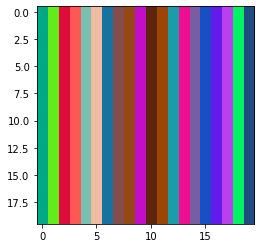

In [27]:
myt=np.zeros((20,20,3))
vstripes=np.random.rand(20,3).reshape(1,20,3)
plt.imshow(myt+vstripes)
plt.show()

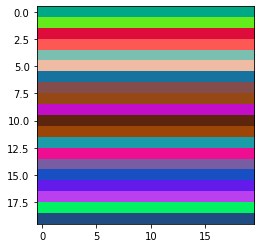

In [29]:
hstripes=vstripes.transpose(1,0,2)
plt.imshow(myt+hstripes)

**NOTE** use bicubic interpolation in `plt.inshow()`

* room 1-4 for stripes and organization
* room 5-7 weaving
* room 8-9 fancy stuff (shading, code refining)
* room 10 alone work